In [ ]:
conda install -c conda-forge/label/cf202003 pandas-profiling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression, SelectKBest
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression # When you wish to implement Linear Regression using sklearn
import statsmodels.formula.api as smf # When you wish to implement Linear Regression using statsmodels. Statsmodels give detailed output 
import pandas_profiling    # To create audit report / do EDA

## Load Data

In [2]:
#import the data
raw_data = pd.read_csv('LoansData.csv')
raw_data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

## Generating Data Audit Report

In [4]:
#Generating the detailed Profile report or EDA using Pandas_Profiling
profile_report=pandas_profiling.ProfileReport(raw_data)
profile_report.to_widgets()

In [5]:
#To include HTML report in the Jupyter Notebook
profile_report.to_notebook_iframe()

In [6]:
#Save the report
profile_report.to_file('Loans_Profile_Report.html')

# Data Preperation
<ol>
    <li>Columns appropriate data types conversion</li>
    <li>Renaming the columns </li>
    <li>Handling Missing Values:
        <ul>
            <li>Categorical Variables: Replace missing values with Mode (most frequently occuring category</li>        
            <li>Numerical Variable: Replace missing values with median or mean or some advance steps like KNN etc.</li>
        </ul></li>
    <li>Converting the data types of columns (If needed)</li>
    <li>Derive some new columns (If needed)</li> 
    <li>Check Multi-collinearity: Variables with high correlation (If Any)</li>
    <li>variables with Low variation</li>
    <li>Variables having large numbers of zeroes (Why) </li>
    <li>Variables with outliers (See Histogram, detailed statistics, can even plot box plot)</li>
    <li>Encoding: List of Categorical Variables need to be encoded</li>
   </ol>

In [7]:
#Converting columns to appropriate data types.
#Here, we need to convert Interest.Rate, loan_length,Debt.To.Income.Ratio, employment_length
#Remove % character from Interest.Rate and Debt.To.Income.Ratio columns with '' (because of this character the data type of these columns is object)
#Remove {'months','years','<','+'} character from Employment.Length and Loan.Length columns with '' (because of this character the data type of these columns is object)
#Once above step is done,convert it into float data type  
raw_data['Interest.Rate']=raw_data['Interest.Rate'].apply(lambda x:float(str(x).replace('%','')))
raw_data['Debt.To.Income.Ratio']=raw_data['Debt.To.Income.Ratio'].apply(lambda x:float(str(x).replace('%','')))
raw_data['Employment.Length']=raw_data['Employment.Length'].apply(lambda x:(str(x).replace('<','')))
raw_data['Employment.Length']=raw_data['Employment.Length'].apply(lambda x:(str(x).replace('+','')))
raw_data['Employment.Length']=raw_data['Employment.Length'].apply(lambda x:(str(x).replace(' years',''))) #A space before year because values are 1 year
raw_data['Employment.Length']=raw_data['Employment.Length'].apply(lambda x:float(str(x).replace(' year','')))
raw_data['Loan.Length']=raw_data['Loan.Length'].apply(lambda x:float(str(x).replace(' months','')))
#Check if the changes are done. 
#The data types of Interest.Rate, Debt.To.Income.Ratio,Employment.Length and Loan.Length should be float64
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   float64
 4   Loan.Length                     2500 non-null   float64
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [8]:
#Convert FICO Range. It is a categorical variable
#Take lower band and upper band and take average of it
#We first split FICO.Range into 2 different columns Fico_Low and Fico_High.
#Data Types of Fico_Low and Fico_High will be object because FICO.Range is object and we are splitting the string so resulting columns will also be of type String (Object)
#Explicitly convert the values to float using astype()
raw_data[['Fico_Low','Fico_High']]=raw_data['FICO.Range'].str.split('-',expand=True)
raw_data['Fico_Average']=(raw_data['Fico_Low'].astype('float')+raw_data['Fico_High'].astype('float'))/2
raw_data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_Low,Fico_High,Fico_Average
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735,739,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715,719,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690,694,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695,699,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695,699,697.0


In [9]:
#Dropping the columns which we know(by business domain knowledge) will not be helpful in predicting the interest rates.
#We drop Amount.Funded.By.Investors column as this will not be present in the new data for which we needed to predict the interest rates
#As it is a part of decision making
#We are dropping State column as well (For now) as it have more than 46 unique state values (Too many categories)
final_data=raw_data.drop(['Fico_Low','Fico_High','FICO.Range','LoanID','Amount.Funded.By.Investors','State'],axis=1)
final_data.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'Home.Ownership', 'Monthly.Income',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'Fico_Average'],
      dtype='object')

In [10]:
#Separate the numerical and categorical variables because they have different treatments
#Categorical Variables: Loan.Purpose,State, Home.Ownership
#WAY 1: #cat_vars=['Loan.Purpose','Home.Ownership']
#num_vars=['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Debt.To.Income.Ratio','Monthly.Income','Open.CREDIT.Lines','Revolving.CREDIT.Balance','Inquiries.in.the.Last.6.Months','Employment.Length','Fico_Average']
#Another Better way: To create a user-defined function
cat_vars=[key for key in dict(final_data.dtypes) if dict(final_data.dtypes)[key] in ['object']]
num_vars=[key for key in dict(final_data.dtypes) if dict(final_data.dtypes)[key] in ['float64','int64','float32','int32']]
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)
data_cat=final_data[cat_vars]
data_num=final_data[num_vars]

Categorical Variables:  ['Loan.Purpose', 'Home.Ownership']
Numerical Variables:  ['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'Fico_Average']


In [11]:
#Handling the outliers and missing values in numerical variables
#data_num['Amount.Requested']=data_num['Amount.Requested'].clip_upper(data_num['Amount.Requested'].quantile(0.01))
#data_num['Amount.Requested']=data_num['Amount.Requested'].clip_lower(data_num['Amount.Requested'].quantile(0.01))
#data_num=data_num.apply(lambda x: x.fillna(x.median()))

#Better way: using user-defined function
def num_outlier_miss_treat(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    x = x.fillna(x.median())
    return x

def cat_outlier_miss_treat(x):
    x=x.fillna(x.mode())
    return x

In [12]:
data_num_new = data_num.apply(num_outlier_miss_treat)

In [13]:
data_cat_new = data_cat.apply(cat_outlier_miss_treat)

In [14]:
#Creating the dummy variables
cat_dummies=pd.get_dummies(data_cat_new,drop_first=True)

In [15]:
#Combine the cleaned and wrangled numerical and categorical datasets into single dataset
final_data_new=pd.concat([data_num_new,cat_dummies],axis=1)
final_data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_Average,...,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1


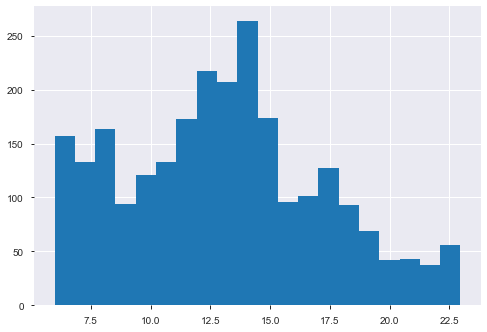

In [16]:
# Checking Assumptions of Linear Regression
#Check if the Y variable (Target variable) follows normal distribution or not
#1. using Histogram: If it is Bell Shaped Curve we can say that the variable follows normal distribution
#2. DW Test
#3. Shaipro Test
final_data_new['Interest.Rate'].hist(bins=20)


In [17]:
# Above Y variable does not follow normal distribution completely. It is somewhat skewed
#Therefore, apply some transformations on Y so that the new Z=f(Y) variable follows normal distribution
final_data_new['ln.Interest.Rate']=np.log(final_data_new['Interest.Rate'])

## Feature Selection
### 1.Correlation

In [18]:
#Let us check correlation of X variables with our Y Variable Interest.Rate
#This will give us correlation of X variables only with Y variable and not between the different X Variables which is shown in correlation matrix
final_data_new.corrwith(final_data_new['Interest.Rate'])

Amount.Requested                   0.330780
Interest.Rate                      1.000000
Loan.Length                        0.423147
Debt.To.Income.Ratio               0.173002
Monthly.Income                     0.036206
Open.CREDIT.Lines                  0.083050
Revolving.CREDIT.Balance           0.083611
Inquiries.in.the.Last.6.Months     0.170408
Employment.Length                  0.052629
Fico_Average                      -0.712008
Loan.Purpose_credit_card          -0.001415
Loan.Purpose_debt_consolidation    0.130199
Loan.Purpose_educational          -0.038466
Loan.Purpose_home_improvement     -0.088661
Loan.Purpose_house                 0.008394
Loan.Purpose_major_purchase       -0.111582
Loan.Purpose_medical              -0.037276
Loan.Purpose_moving                0.012362
Loan.Purpose_other                 0.006913
Loan.Purpose_renewable_energy     -0.030727
Loan.Purpose_small_business       -0.010026
Loan.Purpose_vacation             -0.023690
Loan.Purpose_wedding            

#### X Variables having Linear Reltionship with Y
#### From above table showing X variables correlation with Y, the following variables exhibit 10% or more correlation (positive/negative). 
<ol>
    <li>Amount.Requested           0.330780
    <li>Loan.Length                0.423147</li>
    <li>Debt.To.Income.Ratio           0.173002</li>
    <li>Inquiries.in.the.Last.6.Months 0.170408</li>
    <li>Fico_Average                   -0.712008</li>
    <li>Loan.Purpose_debt_consolidation 0.130199</li>
    <li>Loan.Purpose_major_purchase     -0.111582</li>
</ol>
ln.Interest.Rate  is the target variable

## 2. F_Regression

In [19]:
#Feature Selection using F-Regression
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway


In [20]:
#Extracting the features names from the dataset (difference method will drop the specified columns and remaining columns will be returned to Features variable)
features = final_data_new.columns.difference(['Interest.Rate','ln.Interest.Rate'])
X=final_data_new[features]
Y=final_data_new['ln.Interest.Rate']

In [21]:
#F-Regression : Univariate linear regression tests. 

F_values, p_values = f_regression(X,Y)
F_reg_results=pd.concat([pd.Series(X.columns),pd.Series(F_values),pd.Series(p_values)],axis=1)
#Giving the column names to the dataset
F_reg_results.columns=['Features','F_Values','P_values']
#sor the dataset as per the values. High F_values and low P_Values are good
F_reg_results.sort_values('F_Values',ascending=False, inplace=True)
F_reg_results.to_csv('F_Regression_Results.csv')

## 3. Recursive Feature Elimination (RFE)

In [22]:
#Feature Selection using RFE (Recursive Feature Elimination)
#Suppose you have n variables. With these n variables we build regression and find the most insignificant variable based on p-value and drop it.
#Repeat till you get the desrired list of variables.If no number of features specified, half of the features are selected 
from sklearn.linear_model import LinearRegression
RFEmodel=RFE(LinearRegression(), n_features_to_select=10)
RFEmodel=RFEmodel.fit(X,Y)
#To get top 15 columns
RFE_selected_columns=X.columns[list(RFEmodel.get_support())]

In [23]:
#To see RFE features ranking
#The list specified feature position and the position with 1 are the selected features
RFEmodel.ranking_

array([15, 14, 11,  9,  1,  1,  3, 10,  2,  4,  1,  1,  5,  8,  1,  7, 12,
        1,  1,  6,  1,  1,  1, 16, 13, 17])

In [24]:
#List of variables selected from RFE 
print(pd.Series(RFE_selected_columns))

0                Home.Ownership_NONE
1               Home.Ownership_OTHER
2           Loan.Purpose_credit_card
3    Loan.Purpose_debt_consolidation
4                 Loan.Purpose_house
5                Loan.Purpose_moving
6                 Loan.Purpose_other
7        Loan.Purpose_small_business
8              Loan.Purpose_vacation
9               Loan.Purpose_wedding
dtype: object


## 4. SelectKBest

In [25]:
selectkbest=SelectKBest(f_oneway,k=10)
selectkbest = selectkbest.fit(X,Y)
selectkbest_cols=X.columns[list(selectkbest.get_support())]
print(pd.Series(selectkbest_cols))

0                     Fico_Average
1              Home.Ownership_NONE
2             Home.Ownership_OTHER
3         Loan.Purpose_educational
4               Loan.Purpose_house
5             Loan.Purpose_medical
6              Loan.Purpose_moving
7    Loan.Purpose_renewable_energy
8            Loan.Purpose_vacation
9             Loan.Purpose_wedding
dtype: object


## Reducing further list of variables using VIF-Variance Inflation Factor(By remove multicollinierity)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [27]:
X.columns

Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Employment.Length',
       'Fico_Average', 'Home.Ownership_NONE', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT',
       'Inquiries.in.the.Last.6.Months', 'Loan.Length',
       'Loan.Purpose_credit_card', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_educational', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_house', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_medical', 'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Monthly.Income',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance'],
      dtype='object')

In [28]:
X_New = X[['Amount.Requested','Loan.Length','Debt.To.Income.Ratio','Inquiries.in.the.Last.6.Months','Fico_Average','Loan.Purpose_debt_consolidation','Loan.Purpose_major_purchase','Home.Ownership_NONE','Home.Ownership_OTHER','Loan.Purpose_educational','Loan.Purpose_house','Loan.Purpose_medical','Loan.Purpose_moving','Loan.Purpose_renewable_energy','Loan.Purpose_vacation','Loan.Purpose_wedding','Loan.Purpose_home_improvement','Home.Ownership_RENT','Revolving.CREDIT.Balance','Open.CREDIT.Lines','Loan.Purpose_credit_card','Loan.Purpose_other','Loan.Purpose_small_business']]

In [29]:
X_New = X_New[X_New.columns.difference([ 'Loan.Purpose_debt_consolidation', 'Loan.Length', 'Open.CREDIT.Lines', 'Debt.To.Income.Ratio', 'Revolving.CREDIT.Balance', 'Home.Ownership_RENT'])]

In [30]:
#This will calculate the VIF for each variable
VIF = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]
#create the dataframe to look for VIF for each variable
VIF_results=pd.concat([pd.Series(X_New.columns),pd.Series(VIF)],axis=1)
VIF_results.columns=['Feature', 'VIF']
VIF_results.sort_values('VIF', ascending=False, inplace=True)
VIF_results

,Feature,VIF
1,Fico_Average,5.775424
0,Amount.Requested,3.816253
4,Inquiries.in.the.Last.6.Months,1.605244
5,Loan.Purpose_credit_card,1.329892
12,Loan.Purpose_other,1.192121
7,Loan.Purpose_home_improvement,1.122241
9,Loan.Purpose_major_purchase,1.103967
14,Loan.Purpose_small_business,1.067533
10,Loan.Purpose_medical,1.034368
16,Loan.Purpose_wedding,1.031045


In [31]:
#Final list of columns to be included in the model
X_New.columns

Index(['Amount.Requested', 'Fico_Average', 'Home.Ownership_NONE',
       'Home.Ownership_OTHER', 'Inquiries.in.the.Last.6.Months',
       'Loan.Purpose_credit_card', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding'],
      dtype='object')

## Splitting the dataset into Test and Train set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
final_data = pd.concat([X_New, Y], axis=1)
final_data.head()

,Amount.Requested,Fico_Average,Home.Ownership_NONE,Home.Ownership_OTHER,Inquiries.in.the.Last.6.Months,Loan.Purpose_credit_card,Loan.Purpose_educational,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,ln.Interest.Rate
0,20000.0,737.0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,717.0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,692.0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,697.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,697.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,2.460443


In [34]:
final_data.columns= [x.strip().replace('.', '_') for x in final_data.columns]

In [35]:
train, test = train_test_split(final_data, test_size = 0.3, random_state =123)

## Model Building

In [36]:
# statsmodel provides better output report
import statsmodels.formula.api as smf

In [37]:
formula = 'ln_Interest_Rate' + '~' + '+'.join(train.columns.difference(['ln_Interest_Rate','Loan_Purpose_moving','Loan_Purpose_house','Loan_Purpose_wedding' ,'Home_Ownership_NONE','Loan_Purpose_renewable_energy','Loan_Purpose_home_improvement', 'Home_Ownership_OTHER', 'Loan_Purpose_educational', 'Loan_Purpose_vacation', 'Loan_Purpose_medical']))

In [38]:
train.columns

Index(['Amount_Requested', 'Fico_Average', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_credit_card', 'Loan_Purpose_educational',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_house',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_medical',
       'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'ln_Interest_Rate'],
      dtype='object')

In [39]:
model = smf.ols(formula , train)
model = model.fit()

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     628.1
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:50:10   Log-Likelihood:                 509.85
No. Observations:                1750   AIC:                            -1004.
Df Residuals:                    1742   BIC:                            -960.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Validating the Model

In [41]:
test_pred = np.exp(model.predict(test))
train_pred = np.exp(model.predict(train))

In [42]:
train_y = np.exp(train.ln_Interest_Rate)
test_y = np.exp(test.ln_Interest_Rate)

In [43]:
#Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('Train_MAPE=', MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('Train_RMSE=',RMSE_train)
RMSPE_train =np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('Train_RMSPE=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('Train_Corr=',corr_train)

Train_MAPE= 0.14204579567898157
Train_RMSE= 2.2331050785043587
Train_RMSPE= 0.18629967647689563
Train_Corr= 0.8438900770459166


In [44]:
#Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.14750240590455269
Test_RMSE= 2.319708085615089
Test_RMSPE= 0.1926579958470753
Test_Corr= 0.83218357391291


## Checking assumptions of Linear Regression using Errors

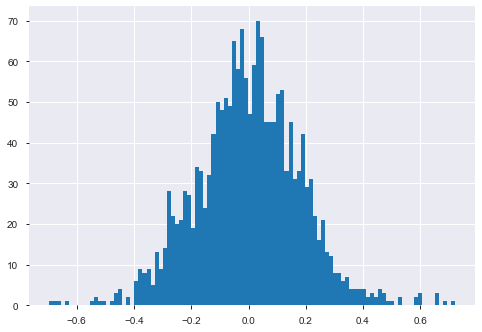

In [45]:
model.resid.hist(bins=100)

In [53]:
np.corrcoef(train_y, train_pred)

array([[1.        , 0.84389008],
       [0.84389008, 1.        ]])

In [54]:
np.corrcoef(train_y, model.resid)

array([[1.        , 0.52629863],
       [0.52629863, 1.        ]])

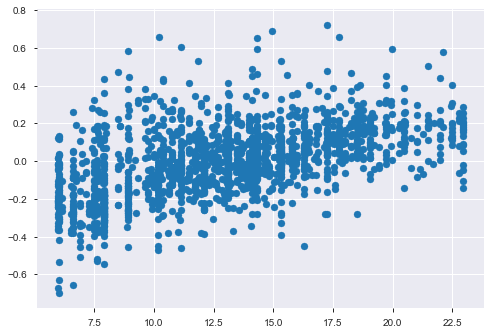

In [55]:
plt.scatter(train_y, model.resid)

## Savind the Model

In [46]:
### Saving model as object
import pickle
# now you can save it to a file
with open('reg_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [47]:
#Loading the model object
import pickle
# and later you can load it
with open('reg_model.pkl', 'rb') as f:
    model = pickle.load(f)

## Model validation using Decile Analysis

In [48]:
train_new = pd.concat([train_y, train_pred], axis=1)
train_new.columns = ['actual', 'pred']
test_new = pd.concat([test_y, test_pred], axis=1)
test_new.columns = ['actual', 'pred']

In [49]:
train_new['Deciles'] = pd.qcut(train_new.pred, 10, labels=False)

In [50]:
train_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.462366,6.992179
1,8.744263,8.990606
2,9.777600,10.347575
3,11.548857,11.416473
4,12.783771,12.407240
5,13.546229,13.340801
6,14.679714,14.263581
7,15.795257,15.183595
8,16.789943,16.214508


In [51]:
test_new['Deciles'] = pd.qcut(test_new.pred, 10, labels=False)

In [52]:
test_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.777067,7.055170
1,8.889867,9.317640
2,10.324000,10.546000
3,11.500933,11.597560
4,12.765333,12.513082
5,13.921818,13.347130
6,14.727123,14.157044
7,15.559733,15.015880
8,16.738800,16.293275
